### Sinusoidal response

We consider the response of a second order system to a sinusoidal input

The equations of motion are given as

\begin{align}
    \ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = \frac{1}{m} F_0 \sin(\omega t) 
\end{align}

Taking the Laplace transform gives

\begin{align}
    X(s) = \left( \frac{F_0 w}{m} \right) \left( \frac{1}{s^2 + \omega^2} \right) \left( \frac{1}{s^2 + 2 \zeta \omega_n s + \omega_n^2}\right)
\end{align}

The inverse Laplace transform gives the solution as the sum of two terms:

\begin{align}
    x(t) = x_{tran}(t) + x_{steady-state}(t)
\end{align}

### Steady State component

\begin{align}
    x_{ss}(t) = \frac{F_0}{k} A(\omega) \sin(\omega t - \theta(\omega))
\end{align}

with 

\begin{align}
    A(\omega) &= \frac{1}{\sqrt{\left( 1 - \left(\frac{\omega}{\omega_n} \right)^2\right)^2 + \left( 2 \zeta \frac{\omega}{\omega_n}\right)^2}} , \\
    \theta(\omega) &= \arctan\left[\frac{2 \zeta \frac{\omega}{\omega_n}}{1 - \left( \frac{\omega}{\omega_n}\right)^2}\right]
\end{align}

Let's look at the behavior for a variety of examples.

In [1]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pylab as plt

from ipywidgets import interact
import ipywidgets as widgets
np.set_printoptions(2)

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

def A(w, wn, zeta):
    A = 1 / np.sqrt((1 - (w/wn)**2)**2 + (2*zeta*w/wn)**2)
    return A

def T(w, wn, zeta):
    T = np.arctan2((2*zeta*w/wn),(1-(w/wn)**2))
    return T


### Define our example system
We define our system and some parameters for an example:

\begin{align}
    k = 2 \quad m = 4 \quad c = 1 \\
    f(t) = 2 \sin \omega t
\end{align}

Lets look at the behavior of the amplitude and phase functions

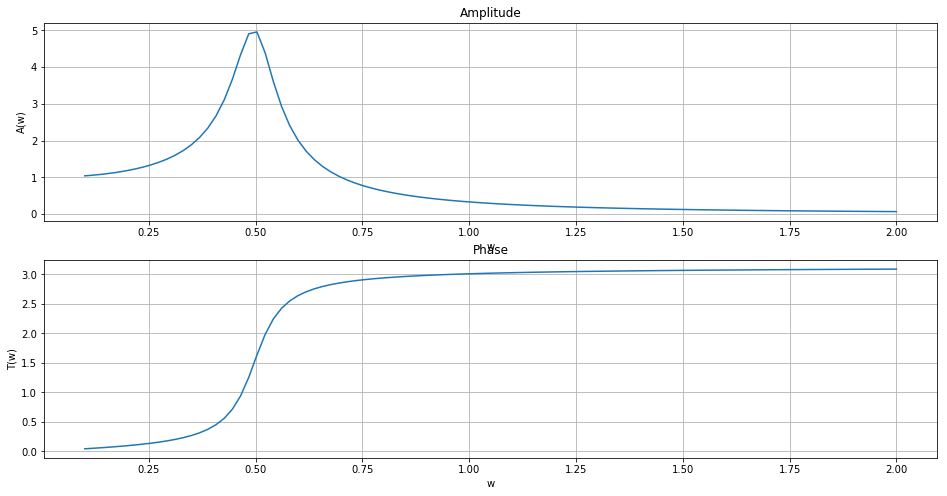

In [2]:
def pltss_terms(wn, zeta):
    w = np.linspace(0.1, 2, 100)
    
    amp = A(w, wn, zeta)
    theta = T(w, wn, zeta)
    
    fig, axarr=plt.subplots(2,1, figsize=(16,8))
    axarr[0].plot(w,amp)
    axarr[0].set_title('Amplitude')
    axarr[0].set_xlabel('w')
    axarr[0].set_ylabel('A(w)')
    axarr[0].grid(True)
    
    axarr[1].plot(w,theta)
    axarr[1].set_title('Phase')
    axarr[1].set_xlabel('w')
    axarr[1].set_ylabel('T(w)')
    axarr[1].grid(True)
    
_ = interact(pltss_terms, wn=(0.2,1.5, 0.1), zeta=(0.1, 1.2, 0.1))

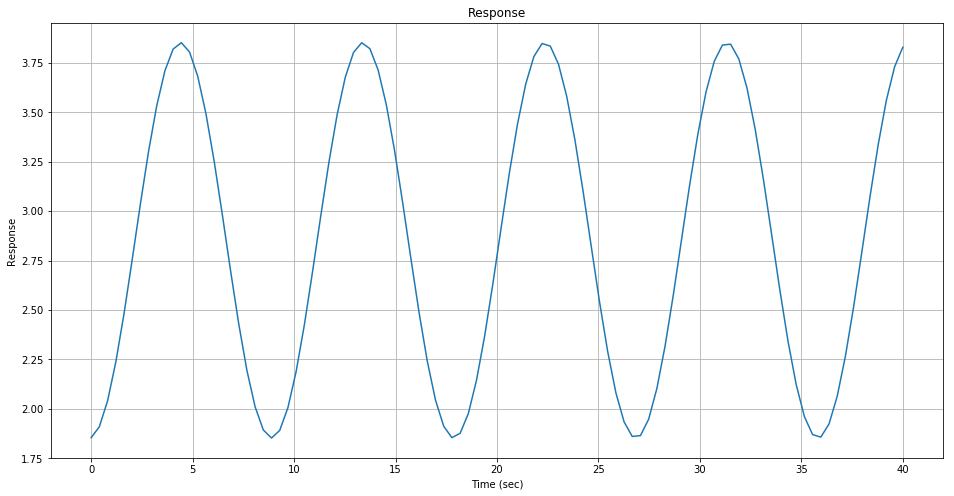

In [3]:
def ssresp( w):
    time = np.linspace(0,40,100)
    
    k = 2
    m = 4
    c = 1
    F0 = 2
    
    wn = np.sqrt(k/m)
    zeta = c/2/np.sqrt(k*m)
    
    resp = F0/k * A(w, wn, zeta) + np.sin(w*time - T(w, wn, zeta))
    
    # plot the response and print some things to the plto
    fig, axarr=plt.subplots(1,1, figsize=(16,8))
    axarr.plot(time,resp)
    axarr.set_title('Response')
    axarr.set_xlabel('Time (sec)')
    axarr.set_ylabel('Response')
    axarr.grid(True)
    
_ = interact(ssresp, w=(0.1, 1.5, 0.1))

### Transient Response

The transient component of the response is given by

\begin{align}
    x_{tran}(t) = \frac{F_0}{k} A(\omega) \frac{\omega}{\omega_n} \exp (-\zeta \omega_n t) \frac{\sin(\omega t \sqrt{1-\zeta^2} + \theta_T(\omega))}{\sqrt{1-\zeta^2}}
\end{align}

with 

\begin{align}
    \theta_T(\omega) = \arctan \frac{2 \zeta \sqrt{1-\zeta^2}}{2 \zeta^2 - \left(1 - \left( \frac{\omega}{\omega_n}\right)^2 \right)}
\end{align}

The transient component is a little more difficult to analyze but we can still plot the response and see the behavior for changes in $ \omega, \omega_n$ and $\zeta$

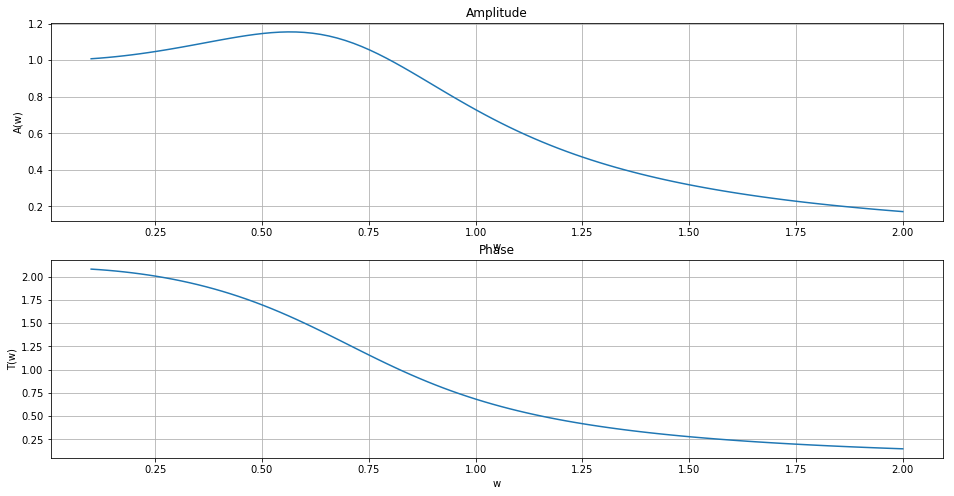

In [4]:
def Ttran(w, wn, zeta):
    T = np.arctan2(2*zeta*np.sqrt(1-zeta**2), 2*zeta**2 - (1-(w/wn)**2))
    return T

def plttrans_terms(wn, zeta):
    w = np.linspace(0.1, 2, 100)
    
    amp = A(w, wn, zeta)
    theta = Ttran(w, wn, zeta)
    
    fig, axarr=plt.subplots(2,1, figsize=(16,8))
    axarr[0].plot(w,amp)
    axarr[0].set_title('Amplitude')
    axarr[0].set_xlabel('w')
    axarr[0].set_ylabel('A(w)')
    axarr[0].grid(True)
    
    axarr[1].plot(w,theta)
    axarr[1].set_title('Phase')
    axarr[1].set_xlabel('w')
    axarr[1].set_ylabel('T(w)')
    axarr[1].grid(True)
    
_ = interact(plttrans_terms, wn=(0.2,1.5, 0.1), zeta=(0.1, 0.99, 0.1))

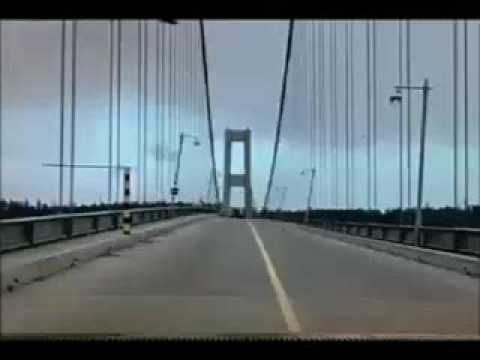

In [5]:
### Real life example
from IPython.display import YouTubeVideo
YouTubeVideo('j-zczJXSxnw')